# Document Image Quality Assessment

We'll use SmartDoc QA dataset

In [1]:
%cd ..

C:\Users\mary\source\repos\OCR


In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
!pip install -r requirements.txt

   ---------------------------------------- 0.0/47.6 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.6 kB ? eta -:--:--
   ------------------------- -------------- 30.7/47.6 kB 325.1 kB/s eta 0:00:01
   ---------------------------------------- 47.6/47.6 kB 397.0 kB/s eta 0:00:00


In [2]:
!curl -o "data/Dataset SmartDoc-QA.zip" https://zenodo.org/records/5293201/files/Dataset%20SmartDoc-QA.zip?download=1

^C


In [10]:
!tar -xf "data/terraform_1.9.5_windows_amd64.zip" -C data

In [3]:
import cv2
import glob
import PIL
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from src.data.parsed_image import ParsedImage
from src.settings import RAW_DATA_PATH

Let's look at one of the images:

In [6]:
files = glob.glob(str(RAW_DATA_PATH) + '/Captured_Images/Nokia_phone/Images/*')

In [7]:
img = cv2.imread(files[0])

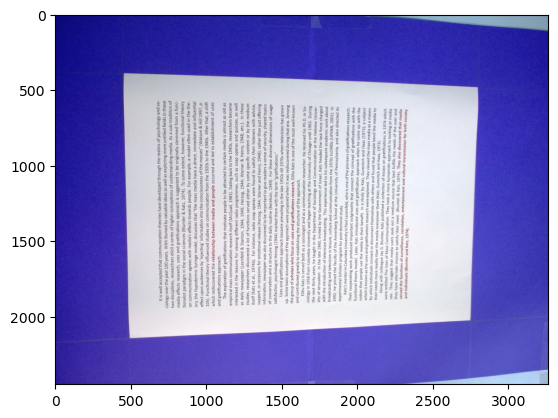

In [8]:
plt.imshow(img)

We'll need to prepare the photo for the algorithm

In [9]:
from src.utils.preprocess_smartdoc import preprocess_image

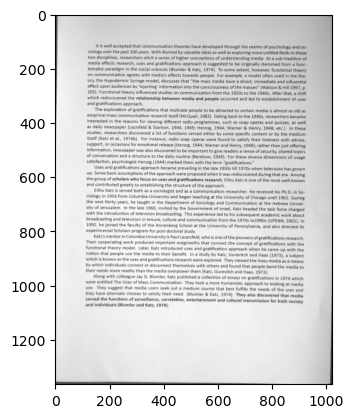

In [10]:
prep_img = preprocess_image(img, rotate=True)
plt.imshow(prep_img, cmap='grey')

In [12]:
parsed = ParsedImage(prep_img)

In [15]:
df = parsed.get_feature_df()

Let's look at the features we got:

In [17]:
df

cc.FS                          10.000000
cc.SSF                          0.193087
cc.TCF                          0.197300
cc.WSF                          0.274869
cc.SWS                          0.000000
cc.SW_1                         7.171809
cc.SW_2                        25.117735
cc.height_width_ratio           1.402180
cc.characters_to_cc_ratio       0.349617
morph.erosion                   0.020000
morph.dilation                  0.072000
morph.closing                   0.194382
morph.opening                   0.386302
noise.gaussian_1                0.066740
noise.gaussian_2                0.104459
noise.gaussian_3                0.293560
noise.gaussian_4                0.517292
noise.median_1                  0.136615
noise.median_2                  0.497371
spatial.foreground_percent      0.151738
spatial.gradients_1             1.644769
spatial.gradients_2             1.504199
spatial.gradients_3             0.622538
statistical.entropy_1           0.342204
statistical.entr

Now let's parse the whole dataset

In [19]:
from src.data.smartdoc_dataset import create_smartdoc_ds

In [20]:
create_smartdoc_ds(RAW_DATA_PATH, 'data/smartdoc_ds.pkl')

100%|██████████| 2130/2130 [07:36<00:00,  4.66it/s] 
